In [ ]:
# Python Version : 3.9.18
# Pandas Version : 2.1.1
# Matplotlib Version : 3.8.0
# Created: OCT. 18. 2023
# Author: D.W. SHIN

import platform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sysOS = platform.system()

if sysOS == 'Windows':
    # Windows 일 경우
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False
elif sysOS == 'Darwin':
    # Mac일 경우
    plt.rcParams['font.family'] ='AppleGothic'
    plt.rcParams['axes.unicode_minus'] =False
else:
    print('Please check your Korean font!!')


In [ ]:
cvsPath = '../data/Industry_Employed_Immigrants_10th_20231018150816.csv'

df1 = pd.read_csv(cvsPath, encoding='euc-kr', header=[0,1], skipinitialspace=True)

In [ ]:
df1.info()

In [ ]:
df1.head()

In [ ]:
# Multi Header 선택하기
df1[('2017', '합계 (천명)')]

In [ ]:
# 한번 더 복습~!
df1[('2017','농림어업 (천명)')]

In [ ]:
df1.loc[3, :]

In [ ]:
ps = df1.iloc[3, :]

In [ ]:
ps.info()

In [ ]:
df2 = pd.DataFrame(ps)
df2

In [ ]:
df2.info()

In [ ]:
df2.index

In [ ]:
df2.columns

In [ ]:
df2.drop([('대상별(1)',           '대상별(1)'),
          ('특성별(1)',           '특성별(1)'),
          ('특성별(2)',           '특성별(2)')], axis=0, inplace=True)

In [ ]:
df2.head(10)

In [ ]:
df2.info()

In [ ]:
df2 = df2.reset_index()

In [ ]:
df2.head()

In [ ]:
df2.columns = ['연도', '목록', '외국인근로총합계']

In [ ]:
# df2['외국인근로총합계'].astype(float)
df2['외국인근로총합계'] = pd.to_numeric(df2['외국인근로총합계'], errors='coerce')

In [ ]:
df2.info()

In [ ]:
df2.head()

In [ ]:
pivot_df = df2.pivot(index='연도', columns='목록', values='외국인근로총합계')
pivot_df

In [ ]:
pivot_df_copy = pivot_df.copy()

In [ ]:
pivot_df = pivot_df.reset_index()

In [ ]:
pivot_df.index

In [ ]:
pivot_df.columns

In [ ]:
# pivot_df.plot.bar(stacked=True, figsize=(15,7))

In [ ]:
chart_base = pivot_df.drop('- 제조업 (천명)', axis=1)
chart_base

In [ ]:
ps2 = pivot_df['합계 (천명)']
chart2 = pd.DataFrame(ps2)
chart2

In [ ]:
chart_base['total'] = chart_base.iloc[:, 1:7].sum(axis=1)

In [ ]:
chart_base['건설업 (천명)P'] = round(chart_base['건설업 (천명)'] / chart_base['total'] * 100, 2)
chart_base['광업·제조업 (천명)P'] = round(chart_base['광업·제조업 (천명)'] / chart_base['total'] * 100, 2)
chart_base['농림어업 (천명)P'] = round(chart_base['농림어업 (천명)'] / chart_base['total'] * 100, 2)
chart_base['도소매·음식·숙박 (천명)P'] = round(chart_base['도소매·음식·숙박 (천명)'] / chart_base['total'] * 100, 2)
chart_base['사업·개인·공공서비스 (천명)P'] = round(chart_base['사업·개인·공공서비스 (천명)'] / chart_base['total'] * 100, 2)
chart_base['전기·운수·통신·금융 (천명)P'] = round(chart_base['전기·운수·통신·금융 (천명)'] / chart_base['total'] * 100, 2)

In [ ]:
chart_base

In [ ]:
chart_base['total_p'] = chart_base.iloc[:, 9:15].sum(axis=1)

In [ ]:
chart_base

In [ ]:
chart_base.head()

In [ ]:
my_df = chart_base.iloc[:,[0, 9,10,11,12,13,14]]

my_df.set_index(my_df['연도'], inplace=True)

my_df.drop('연도', axis=1)

<Figure size 700x700 with 0 Axes>

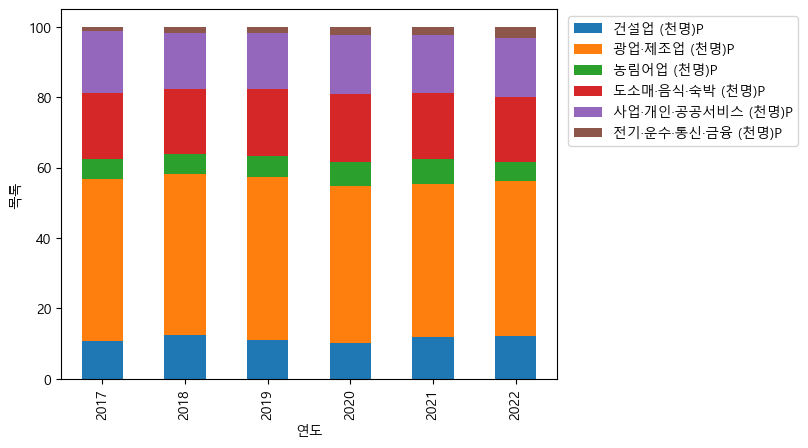

In [900]:
plt.figure(figsize=(7,7))

my_df.plot(kind='bar', stacked=True)

plt.xlabel('연도', fontsize = 10)
plt.ylabel('목록', fontsize = 10)

plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1.0))
plt.show()

### 그외 차트 1
- 잘 안됨!!

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax.set_axisbelow(True)
ax.grid(True, axis='y')

ax.bar(chart_base['연도'], chart_base['건설업 (천명)P'], label = '건설업 (천명)')
ax.bar(chart_base['연도'], chart_base['광업·제조업 (천명)P'], label = '광업·제조업 (천명)')
ax.bar(chart_base['연도'], chart_base['농림어업 (천명)P'], label = '농림어업 (천명)')
ax.bar(chart_base['연도'], chart_base['도소매·음식·숙박 (천명)P'], label = '도소매·음식·숙박 (천명)')
ax.bar(chart_base['연도'], chart_base['사업·개인·공공서비스 (천명)P'], label = '사업·개인·공공서비스 (천명)')
ax.bar(chart_base['연도'], chart_base['전기·운수·통신·금융 (천명)P'], label = '전기·운수·통신·금융 (천명)')

ax.set_xlabel('연도', fontsize = 15)
ax.set_ylabel('목록', fontsize = 15)

ax.tick_params(axis= 'x')
ax.tick_params(axis= 'y')

ax.legend()

for i in range(len(chart_base['연도'])):
    ax.text(chart_base['연도'][i], chart_base['건설업 (천명)P'][i], str(chart_base['건설업 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['광업·제조업 (천명)P'][i], str(chart_base['광업·제조업 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['농림어업 (천명)P'][i], str(chart_base['농림어업 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['도소매·음식·숙박 (천명)P'][i], str(chart_base['도소매·음식·숙박 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['사업·개인·공공서비스 (천명)P'][i], str(chart_base['사업·개인·공공서비스 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')
    ax.text(chart_base['연도'][i], chart_base['전기·운수·통신·금융 (천명)P'][i], str(chart_base['전기·운수·통신·금융 (천명)P'][i]) + '%', fontsize = 15, horizontalalignment='center', color='w')


plt.show()

### 그외 차트 2

In [ ]:
plt.bar(chart_base['연도'], chart_base['건설업 (천명)'])
plt.bar(chart_base['연도'], chart_base['광업·제조업 (천명)'])
plt.bar(chart_base['연도'], chart_base['농림어업 (천명)'])
plt.bar(chart_base['연도'], chart_base['도소매·음식·숙박 (천명)'])
plt.bar(chart_base['연도'], chart_base['사업·개인·공공서비스 (천명)'])
plt.bar(chart_base['연도'], chart_base['전기·운수·통신·금융 (천명)'])
plt.show()

### 그외 차트 3

In [ ]:
bar_chart = chart_base.iloc[:, [0, 9, 10, 11, 12, 13, 14]]
bar_chart.info()

ax = bar_chart.plot(kind='barh', stacked=True, title="산업별 외국인 취업자 비중(%)", rot=0)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)
plt.show()